<a href="https://colab.research.google.com/github/jorferr89/10-ejemplos-opencv-python/blob/main/PosturaPersona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Detección de Postura de una Persona

### Librerías necesarias

In [ ]:
import collections
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Se descarga el archivo porque es muy pesado

In [ ]:
!wget https://github.com/foss-for-synopsys-dwc-arc-processors/synopsys-caffe-models/raw/master/caffe_models/openpose/caffe_model/pose_iter_440000.caffemodel

--2024-03-25 16:31:05--  https://github.com/foss-for-synopsys-dwc-arc-processors/synopsys-caffe-models/raw/master/caffe_models/openpose/caffe_model/pose_iter_440000.caffemodel
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/foss-for-synopsys-dwc-arc-processors/synopsys-caffe-models/master/caffe_models/openpose/caffe_model/pose_iter_440000.caffemodel [following]
--2024-03-25 16:31:05--  https://media.githubusercontent.com/media/foss-for-synopsys-dwc-arc-processors/synopsys-caffe-models/master/caffe_models/openpose/caffe_model/pose_iter_440000.caffemodel
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respon

### Código comentado

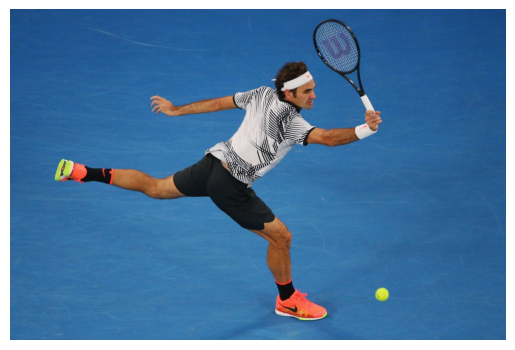

In [ ]:
# Archivos del modelo
protoFile = "pose_deploy_linevec.prototxt"
weightsFile = "pose_iter_440000.caffemodel"

# Ruta de la imagen
imageInput = "imagen-federer.jpg"

# Cargar la imagen
frame = cv2.imread(imageInput)

# Convertir la imagen de BGR a RGB
image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Mostrar la imagen usando plt
plt.imshow(image_rgb)
plt.axis('off')  # Ocultar los ejes
plt.show()

In [ ]:
# Ancho y alto de la imagen
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]

# Umbral de confianza para los puntos detectados
threshold = 0.1

# Cargar el modelo de red neuronal para la detección de pose
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

# Variable que almacena el tiempo
t = time.time()

# Preprocesar la imagen para que sea compatible con la red neuronal
inWidth = 368
inHeight = 368
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

# Establecer la entrada de la red neuronal como la imagen preprocesada
net.setInput(inpBlob)

# Realizar la inferencia en la red neuronal
output = net.forward()

# Mostrar el tiempo que tomó realizar la inferencia
print("Tiempo que tomó realizar la inferencia : {:.3f}".format(time.time() - t))

# Número de puntos clave (landmarks) para la detección de pose
nPoints = 18

# Puntos clave detectados en la imagen
points = []

# Procesar los resultados de la detección de pose
for i in range(nPoints):
    probMap = output[0, i, :, :]
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    x = (frameWidth * point[0]) / output.shape[3]
    y = (frameHeight * point[1]) / output.shape[2]

    if prob > threshold:
        cv2.circle(frame, (int(x), int(y)), 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
    points.append((int(x), int(y)))

# Pares de puntos para dibujar líneas y representar la pose
POSE_PAIRS = [[1, 0], [1, 2], [1, 5], [2, 3], [3, 4], [5, 6], [6, 7], [1, 8], [8, 9], [9, 10], [1, 11],
              [11, 12], [12, 13], [0, 14], [0, 15], [14, 16], [15, 17]]

Tiempo que tomó realizar la inferencia : 5.678


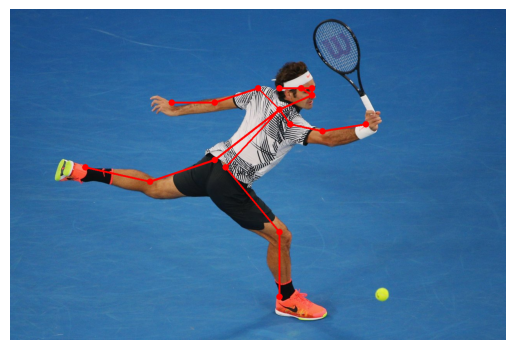

In [ ]:
# Convertir la imagen de BGR a RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Dibuja las líneas en la imagen
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(frame, points[partA], points[partB], (0, 0, 255), 3)

# Muestra la imagen con los puntos unidos por líneas
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()